In [178]:
import os
import numpy as np
import pandas as pd
import datetime
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [492]:
train_test_split(channel_one, channel_one_new, test_size=0.3)

[        channel_id   pm2_5    pm10  s2_pm2_5  s2_pm10            Site  \
 142033      912223   38.68   46.42     37.45    45.18  Banda, Kampala   
 251814      912223   61.58   76.35     59.92    73.58  Banda, Kampala   
 230583      912223   40.60   48.85     41.35    49.92  Banda, Kampala   
 374368      912223    0.00    0.00     78.85    93.12  Banda, Kampala   
 27502       912223   50.68   64.20     50.65    64.13  Banda, Kampala   
 ...            ...     ...     ...       ...      ...             ...   
 78390       912223   11.55   12.17      9.23    11.93  Banda, Kampala   
 361322      912223    0.00    0.00     39.97    49.08  Banda, Kampala   
 136090      912223   40.02   50.47     37.08    45.10  Banda, Kampala   
 147577      912223  119.33  139.87    116.30   128.15  Banda, Kampala   
 152935      912223   39.82   46.93     37.22    45.12  Banda, Kampala   
 
                  TimeStamp  
 142033 2020-06-23 08:22:11  
 251814 2020-12-26 22:16:28  
 230583 2020-11-07 1

In [494]:
scaler.fit(channel_one)

ValueError: could not convert string to float: 'Banda, Kampala'

In [179]:
with open('airquality-dataset/sample_dataset.csv') as file:
    n_rows = len(file.readlines())

print (f'Exact number of rows: {n_rows}')

Exact number of rows: 23567842


In [180]:
Data = pd.read_csv('airquality-dataset/sample_dataset.csv', index_col=0, chunksize=50)

In [186]:
Data.get_chunk().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 50 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   channel_id  50 non-null     int64  
 1   pm2_5       50 non-null     float64
 2   pm10        50 non-null     float64
 3   s2_pm2_5    50 non-null     float64
 4   s2_pm10     50 non-null     float64
 5   Site        50 non-null     object 
 6   TimeStamp   50 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ KB


In [187]:
dataType = {'channel_id' : 'uint32',
            'pm2_5' : 'float32',
            'pm10' : 'float32',
            's2_pm2_5' : 'float32',
            's2_pm10' : 'float32',
            'Site' : 'str',
            'TimeStamp' : 'str'
           }

In [188]:
def load_data(dataPath, dataType: dict) -> pd.core.frame.DataFrame:
    data = pd.read_csv(dataPath, dtype=dataType, index_col=0)
    data = data.drop_duplicates(ignore_index=True)
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
    
    return data

In [189]:
data = load_data(dataPath='airquality-dataset/sample_dataset.csv', dataType=dataType)

/home/usman/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [190]:
data.head()

,channel_id,pm2_5,pm10,s2_pm2_5,s2_pm10,Site,TimeStamp
0,912223,37.020000,45.230000,34.070000,39.820000,"Banda, Kampala",2019-11-27 13:24:45
1,912223,41.700001,50.700001,38.549999,47.430000,"Banda, Kampala",2019-11-27 13:26:13
2,912223,42.150002,52.869999,40.549999,49.950001,"Banda, Kampala",2019-11-27 13:30:53
3,912223,45.099998,57.020000,44.750000,55.029999,"Banda, Kampala",2019-11-27 13:32:22
4,912223,41.720001,52.080002,40.000000,49.200001,"Banda, Kampala",2019-11-27 13:33:46


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23530784 entries, 0 to 23530783
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   channel_id  uint32        
 1   pm2_5       float32       
 2   pm10        float32       
 3   s2_pm2_5    float32       
 4   s2_pm10     float32       
 5   Site        object        
 6   TimeStamp   datetime64[ns]
dtypes: datetime64[ns](1), float32(4), object(1), uint32(1)
memory usage: 807.9+ MB


In [192]:
channelSite = dict(zip(data['channel_id'].unique(), data['Site'].unique()))

In [193]:
siteGroups = data.groupby('channel_id')

In [194]:
siteGroups.get_group(x).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467394 entries, 14371685 to 14839078
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   channel_id  467394 non-null  uint32        
 1   pm2_5       467394 non-null  float32       
 2   pm10        467394 non-null  float32       
 3   s2_pm2_5    467394 non-null  float32       
 4   s2_pm10     467394 non-null  float32       
 5   Site        467394 non-null  object        
 6   TimeStamp   467394 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float32(4), object(1), uint32(1)
memory usage: 19.6+ MB


In [197]:
for x in siteGroups.groups:
    if not os.path.exists('data_group'):
        os.makedirs('data_group')
    siteGroups.get_group(x).to_csv(f'data_group/{x}.csv')

In [198]:
def readChannel(channelId: int, dataPath='data_group/') -> pd.core.frame.DataFrame:
    path = dataPath + str(channelId) + '.csv'
    channelData = pd.read_csv(path, index_col=0, parse_dates=['TimeStamp'])
    return channelData

In [199]:
channel_one = readChannel(channelId=list(channelSite.keys())[0])

In [469]:
channel_one_new = channel_one.set_index(['TimeStamp'])

In [473]:
channel_one_new.resample('H').mean()

,channel_id,pm2_5,pm10,s2_pm2_5,s2_pm10
TimeStamp,,,,,
2019-11-27 13:00:00,912223.0,41.258947,51.221579,39.366842,48.085263
2019-11-27 14:00:00,912223.0,35.883077,43.583846,33.868718,39.694359
2019-11-27 15:00:00,912223.0,40.329231,49.360769,38.259744,46.074359
2019-11-27 16:00:00,912223.0,79.226667,90.660238,73.879048,84.298810
2019-11-27 17:00:00,912223.0,81.079250,90.701000,75.360000,84.586750
...,...,...,...,...,...
2021-11-16 02:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-16 04:00:00,NaN,NaN,NaN,NaN,NaN


In [330]:
channel_one.groupby(pd.Grouper(key='TimeStamp', freq='1H')).mean()

,channel_id,pm2_5,pm10,s2_pm2_5,s2_pm10
TimeStamp,,,,,
2019-11-27 13:00:00,912223.0,41.258947,51.221579,39.366842,48.085263
2019-11-27 14:00:00,912223.0,35.883077,43.583846,33.868718,39.694359
2019-11-27 15:00:00,912223.0,40.329231,49.360769,38.259744,46.074359
2019-11-27 16:00:00,912223.0,79.226667,90.660238,73.879048,84.298810
2019-11-27 17:00:00,912223.0,81.079250,90.701000,75.360000,84.586750
...,...,...,...,...,...
2021-11-16 02:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-16 04:00:00,NaN,NaN,NaN,NaN,NaN


In [368]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.multioutput import MultiOutputRegressor

In [474]:
def getFeatures(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    df = df.drop(labels='channel_id', axis=1).groupby(pd.Grouper(key='TimeStamp', freq='1H')).mean().fillna(method='ffill')
    df = df.assign(hour = df.index.hour,
                   day = df.index.day,
                   month = df.index.month,
                   day_of_week = df.index.dayofweek,
                   week_of_year = df.index.week)
    
    return df

def generate_cyclical_features(df: pd.core.frame.DataFrame, col_name: list) -> pd.core.frame.DataFrame:
    
    
    for time_col in col_name:
        kwargs = {
            f'sin_{time_col}' :lambda x: np.sin(2*np.pi*(x[time_col] - x[time_col].min()) / x[time_col].nunique()),
            f'cos_{time_col}' :lambda x: np.cos(2*np.pi*(x[time_col] - x[time_col].min()) / x[time_col].nunique())    
                 }
        df_time = df.assign(**kwargs)[['sin_'+time_col, 'cos_'+time_col]]
        
        df = pd.concat([df, df_time], axis=1)
    
    return df

def oneHotEncoding(df: pd.core.frame.DataFrame, col_name:list) -> pd.core.frame.DataFrame:
    
    return pd.get_dummies(data=df, columns=col_name, drop_first=True)
    
    
def featureLabelSplit(df, target:list):
    Y = df[target].to_numpy()
    X = df.drop(columns=target).to_numpy()
    return (X,Y)
    
def train_test_spliting(X , Y, test_ratio:float):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=test_ratio, shuffle=False)
    return X_train, Y_train, X_val, Y_val

In [475]:
MinMaxScaler?

In [446]:
def scaler_transform(X, Y, scaler="standard"):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "power": PowerTransformer,
        "robust": RobustScaler,
        "quantile": QuantileTransformer
    }
    
    scaler = scalers[scaler]()
    X = scaler.fit_transform(X)
    Y = scaler.fit_transform(Y)
    
    return scaler, X, Y

In [331]:
AA = getFeatures(channel_one)

In [334]:
BB = generate_cyclical_features(AA, ['hour', 'day', 'month',
       'day_of_week', 'week_of_year'])

In [348]:
CC = oneHotEncoding(BB, col_name=['hour', 'day', 'month','day_of_week', 'week_of_year'])

In [361]:
DD = featureLabelSplit(CC, target=['pm2_5', 'pm10', 's2_pm2_5', 's2_pm10'])

In [362]:
P, Q = DD

In [409]:
P_train, Q_train, P_val, Q_val = train_test_spliting(P, Q, test_ratio=0.3)

In [456]:
scaler = RobustScaler()
P_train_scale = scaler.fit_transform(P_train)
P_val_scale = scaler.transform(P_val)

Q_train_scale = scaler.fit_transform(Q_train)
Q_val_scale = scaler.transform(Q_val)

In [457]:
clf = MultiOutputRegressor(estimator=Ridge()).fit(P_train_scale, Q_train_scale)

In [458]:
Y_pred = clf.predict(P_val_scale)

In [459]:
Y_pred

array([[-1.13109931e+00, -1.14459786e+00, -1.09916293e+00,
        -1.14221452e+00],
       [-1.22479924e+00, -1.23414573e+00, -1.20370056e+00,
        -1.24125185e+00],
       [-1.26355555e+00, -1.27095796e+00, -1.23730050e+00,
        -1.27265021e+00],
       ...,
       [-9.92626977e-02, -1.23147425e-01,  1.42712284e-01,
         9.52877928e-02],
       [ 6.32849306e-01,  4.93898803e-01,  4.87581634e-02,
        -1.03394804e-04],
       [-7.52379299e-02, -1.51281185e-01, -3.00242849e-01,
        -3.36449483e-01]])

In [461]:
scaler.inverse_transform(Y_pred)

array([[-2.99202452, -0.92966754,  3.56811309,  5.04850126],
       [-6.91736827, -5.28626198, -0.37708712,  0.65953674],
       [-8.54097516, -7.07721457, -1.64513304, -0.73192136],
       ...,
       [40.23440732, 48.76492963, 50.43589382, 59.88997832],
       [70.90456297, 78.78485303, 46.89010992, 55.66259742],
       [41.24086994, 47.39619374, 33.71897752, 40.75699592]])

In [462]:
Q_val

array([[10.7774359 , 11.75384615, 11.84435897, 13.20615385],
       [ 7.7197619 ,  8.49119048,  8.7297619 ,  9.60833333],
       [ 6.55266667,  7.19466667,  7.44688889,  8.08066667],
       ...,
       [55.364     , 75.686     , 53.398     , 65.636     ],
       [45.17      , 60.45      , 46.58      , 56.07      ],
       [44.58      , 62.68      , 41.23      , 50.88      ]])

In [463]:
Q_val_scale

array([[-0.80241538, -0.88389385, -0.87986378, -0.95813643],
       [-0.8754036 , -0.95095629, -0.96239256, -1.03932154],
       [-0.90326275, -0.97760577, -0.99638539, -1.07379346],
       ...,
       [ 0.26188827,  0.43020325,  0.22120045,  0.22494723],
       [ 0.01855238,  0.11703402,  0.04054105,  0.00908968],
       [ 0.00446878,  0.16287068, -0.10122014, -0.10802309]])

In [464]:
Y_pred

array([[-1.13109931e+00, -1.14459786e+00, -1.09916293e+00,
        -1.14221452e+00],
       [-1.22479924e+00, -1.23414573e+00, -1.20370056e+00,
        -1.24125185e+00],
       [-1.26355555e+00, -1.27095796e+00, -1.23730050e+00,
        -1.27265021e+00],
       ...,
       [-9.92626977e-02, -1.23147425e-01,  1.42712284e-01,
         9.52877928e-02],
       [ 6.32849306e-01,  4.93898803e-01,  4.87581634e-02,
        -1.03394804e-04],
       [-7.52379299e-02, -1.51281185e-01, -3.00242849e-01,
        -3.36449483e-01]])

In [455]:
Q_train_scale

array([[0.01191101, 0.01478711, 0.0650449 , 0.07795967],
       [0.01035905, 0.01258218, 0.0558709 , 0.06416411],
       [0.01164261, 0.01424991, 0.06319763, 0.07465352],
       ...,
       [0.02262745, 0.02567023, 0.12775503, 0.14026273],
       [0.00741109, 0.00825295, 0.04332026, 0.04878706],
       [0.00354595, 0.00382041, 0.02138817, 0.0221616 ]])

In [440]:
Q_val_scale

array([[0.00308034, 0.00335941, 0.04204783, 0.04108246],
       [0.00220641, 0.0024269 , 0.02852002, 0.02712673],
       [0.00187284, 0.00205633, 0.02294805, 0.021201  ],
       ...,
       [0.01582378, 0.02163208, 0.22253018, 0.24445473],
       [0.01291019, 0.01727742, 0.19291717, 0.20734878],
       [0.01274156, 0.01791479, 0.1696802 , 0.18721708]])

In [223]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["pm2_5"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

In [224]:
generate_time_lags(KK, 24)

,pm2_5,pm10,s2_pm2_5,s2_pm10,lag1,lag2,lag3,lag4,lag5,lag6,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-11-28 13:00:00,30.688611,34.675833,28.362222,31.460556,30.525405,25.983953,31.153611,14.856818,17.107442,31.133953,...,0.000000,0.000000,116.990000,110.520800,82.615714,81.079250,79.226667,40.329231,35.883077,41.258947
2019-11-28 14:00:00,22.213421,24.083947,20.923158,22.537632,30.688611,30.525405,25.983953,31.153611,14.856818,17.107442,...,0.000000,0.000000,0.000000,116.990000,110.520800,82.615714,81.079250,79.226667,40.329231,35.883077
2019-11-28 15:00:00,23.437436,26.122564,21.779487,23.848974,22.213421,30.688611,30.525405,25.983953,31.153611,14.856818,...,0.000000,0.000000,0.000000,0.000000,116.990000,110.520800,82.615714,81.079250,79.226667,40.329231
2019-11-28 16:00:00,40.217500,49.051500,37.680000,44.879250,23.437436,22.213421,30.688611,30.525405,25.983953,31.153611,...,0.000000,0.000000,0.000000,0.000000,0.000000,116.990000,110.520800,82.615714,81.079250,79.226667
2019-11-28 17:00:00,87.453721,96.437907,80.326047,88.528140,40.217500,23.437436,22.213421,30.688611,30.525405,25.983953,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.990000,110.520800,82.615714,81.079250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.364000,39.253750,...,38.719070,31.557907,27.168864,26.934186,36.511628,41.242778,47.470000,0.000000,0.000000,0.000000
2021-11-16 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.364000,...,33.848372,38.719070,31.557907,27.168864,26.934186,36.511628,41.242778,47.470000,0.000000,0.000000
2021-11-16 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.956977,33.848372,38.719070,31.557907,27.168864,26.934186,36.511628,41.242778,47.470000,0.000000


In [257]:
KK.assign(hour=KK.index)

/home/usman/.local/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [259]:
feat = KK.assign(hour = KK.index.hour,
                 day = KK.index.day,
                 month = KK.index.month,
                 day_of_week = KK.index.dayofweek,
                 week_of_year = KK.index.week)

In [267]:
feat.day_of_week.nunique()

7

In [274]:
time_col = 'hour'

In [288]:
dico = {f'sin_{time_col}' :lambda x: np.sin(2*np.pi*(x[time_col] - x[time_col].min()) / x[time_col].nunique()),
        f'cos_{time_col}' :lambda x: np.cos(2*np.pi*(x[time_col] - x[time_col].min()) / x[time_col].nunique())}

In [290]:
np.sin(2*np.pi*(13-0)/24)

-0.2588190451025208

In [289]:
KK.assign(hour = KK.index.hour, month=KK.).assign(**dico)

,pm2_5,pm10,s2_pm2_5,s2_pm10,hour,sin_hour,cos_hour
TimeStamp,,,,,,,
2019-11-27 13:00:00,41.258947,51.221579,39.366842,48.085263,13,-0.258819,-9.659258e-01
2019-11-27 14:00:00,35.883077,43.583846,33.868718,39.694359,14,-0.500000,-8.660254e-01
2019-11-27 15:00:00,40.329231,49.360769,38.259744,46.074359,15,-0.707107,-7.071068e-01
2019-11-27 16:00:00,79.226667,90.660238,73.879048,84.298810,16,-0.866025,-5.000000e-01
2019-11-27 17:00:00,81.079250,90.701000,75.360000,84.586750,17,-0.965926,-2.588190e-01
...,...,...,...,...,...,...,...
2021-11-16 02:00:00,NaN,NaN,NaN,NaN,2,0.500000,8.660254e-01
2021-11-16 03:00:00,NaN,NaN,NaN,NaN,3,0.707107,7.071068e-01
2021-11-16 04:00:00,NaN,NaN,NaN,NaN,4,0.866025,5.000000e-01


In [302]:
KK.assign?

In [306]:
KKKK.agg?

In [308]:
KKKK['hour'].apply?

Object `apply` not found.


In [316]:
KKKK[['hour', 'month']].apply(lambda x: np.sin(2*np.pi*(x - x.min()) / x.nunique()), axis=1, result_type='expand')

,hour,month
TimeStamp,,
2019-11-27 13:00:00,-2.449294e-16,0.000000e+00
2019-11-27 14:00:00,3.673940e-16,0.000000e+00
2019-11-27 15:00:00,-4.898587e-16,0.000000e+00
2019-11-27 16:00:00,6.123234e-16,0.000000e+00
2019-11-27 17:00:00,-7.347881e-16,0.000000e+00
...,...,...
2021-11-16 02:00:00,0.000000e+00,1.102182e-15
2021-11-16 03:00:00,0.000000e+00,-9.797174e-16
2021-11-16 04:00:00,0.000000e+00,8.572528e-16


In [230]:
KK_features = (KK.assign)

DatetimeIndex(['2019-11-27 13:00:00', '2019-11-27 14:00:00',
               '2019-11-27 15:00:00', '2019-11-27 16:00:00',
               '2019-11-27 17:00:00', '2019-11-27 18:00:00',
               '2019-11-27 19:00:00', '2019-11-27 20:00:00',
               '2019-11-27 21:00:00', '2019-11-27 22:00:00',
               ...
               '2021-11-15 21:00:00', '2021-11-15 22:00:00',
               '2021-11-15 23:00:00', '2021-11-16 00:00:00',
               '2021-11-16 01:00:00', '2021-11-16 02:00:00',
               '2021-11-16 03:00:00', '2021-11-16 04:00:00',
               '2021-11-16 05:00:00', '2021-11-16 06:00:00'],
              dtype='datetime64[ns]', name='TimeStamp', length=17274, freq='H')

In [219]:
KK['pm2_5'].shift(1)

TimeStamp
2019-11-27 13:00:00          NaN
2019-11-27 14:00:00    41.258947
2019-11-27 15:00:00    35.883077
2019-11-27 16:00:00    40.329231
2019-11-27 17:00:00    79.226667
                         ...    
2021-11-16 02:00:00     0.000000
2021-11-16 03:00:00     0.000000
2021-11-16 04:00:00     0.000000
2021-11-16 05:00:00     0.000000
2021-11-16 06:00:00    45.170000
Freq: H, Name: pm2_5, Length: 17274, dtype: float64

In [213]:
KK['pm2_5']

TimeStamp
2019-11-27 13:00:00    41.258947
2019-11-27 14:00:00    35.883077
2019-11-27 15:00:00    40.329231
2019-11-27 16:00:00    79.226667
2019-11-27 17:00:00    81.079250
                         ...    
2021-11-16 02:00:00     0.000000
2021-11-16 03:00:00     0.000000
2021-11-16 04:00:00     0.000000
2021-11-16 05:00:00    45.170000
2021-11-16 06:00:00    44.580000
Freq: H, Name: pm2_5, Length: 17274, dtype: float64

In [203]:
channel_one.groupby(pd.Grouper(key='TimeStamp', freq='1H')).median()

,channel_id,pm2_5,pm10,s2_pm2_5,s2_pm10
TimeStamp,,,,,
2019-11-27 13:00:00,912223.0,41.700,51.150,39.670,48.850
2019-11-27 14:00:00,912223.0,35.380,43.700,33.580,38.350
2019-11-27 15:00:00,912223.0,36.300,45.000,34.370,40.870
2019-11-27 16:00:00,912223.0,77.865,86.715,70.525,79.775
2019-11-27 17:00:00,912223.0,78.455,88.210,72.810,81.375
...,...,...,...,...,...
2021-11-16 02:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-16 04:00:00,NaN,NaN,NaN,NaN,NaN


In [227]:
KK.corr()

,pm2_5,pm10,s2_pm2_5,s2_pm10
pm2_5,1.000000,0.999412,0.255833,0.256373
pm10,0.999412,1.000000,0.282602,0.284030
s2_pm2_5,0.255833,0.282602,1.000000,0.997424
s2_pm10,0.256373,0.284030,0.997424,1.000000


In [87]:
channel_one.TimeStamp.dt

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7fa35f1a1ca0>>

In [145]:
hour_mean = channel_one.groupby(channel_one.TimeStamp.dt.month)['pm2_5'].mean().to_numpy()

In [146]:
lower, upper = stats.t.interval(alpha=0.95, df=channel_one.groupby(channel_one.TimeStamp.dt.month)['pm2_5'].count()-1, 
                 loc=channel_one.groupby(channel_one.TimeStamp.dt.month)['pm2_5'].mean(),
                scale=channel_one.groupby(channel_one.TimeStamp.dt.month)['pm2_5'].std())

In [110]:
lower.reshape(-1,1).shape

(24, 1)

In [147]:
hour_mean

array([ 65.18920386,  59.82245696,  37.96603084,  25.8360199 ,
        29.70515476,  46.04323767,  87.03750805, 136.67150925,
        39.67616047,  44.26139234,  41.73948743,  53.339399  ])

In [125]:
pd.DataFrame?

In [148]:
DDD = pd.DataFrame(data=np.array([hour_mean, lower, upper]).T)

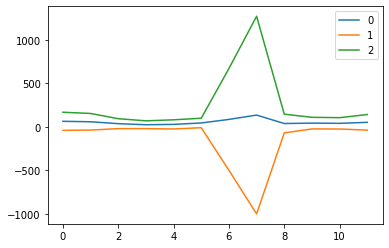

In [149]:
DDD.plot()

In [155]:
channel_one.groupby(channel_one.TimeStamp.dt.year)['pm2_5'].describe()

,count,mean,std,min,25%,50%,75%,max
TimeStamp,,,,,,,,
2019,16719.0,59.579169,47.443451,1.93,27.57,43.02,76.425,609.17
2020,237305.0,59.988219,224.187822,0.00,20.22,37.47,56.030,3663.30
2021,153028.0,47.896370,151.089488,0.00,18.27,34.50,50.380,3772.25


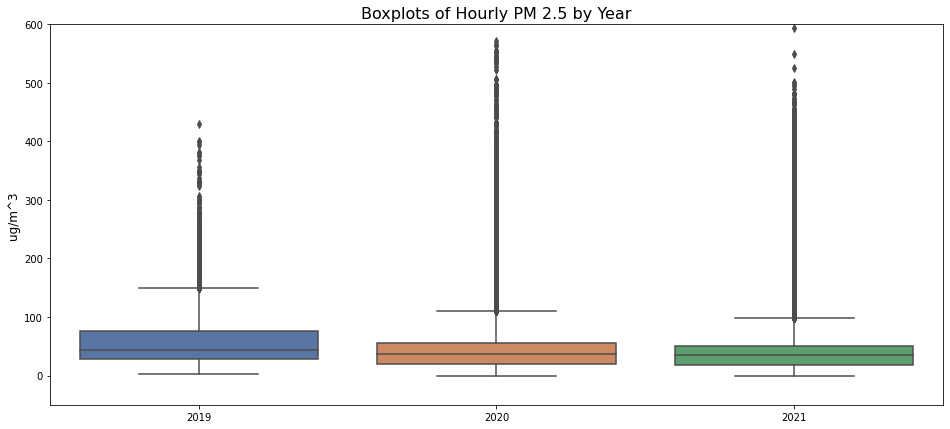

In [153]:
plt.figure(figsize=(16,7))

ax=sns.boxplot(x=channel_one.TimeStamp.dt.year, y='pm2_5', data=channel_one, orient='v', palette = sns.color_palette("deep", 5))
ax.set(ylim=(-50, 600))

plt.title('Boxplots of Hourly PM 2.5 by Year', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12);

In [ ]:
fig = plt.figure(figsize=(14,10))
testing[['date', 'pm2_5', 'pm10', 's2_pm2_5', 's2_pm10']].plot(x='date', subplots=True, layout=(2,2),
                                                              figsize=(14,10), sharex=False, rot=45)
plt.tight_layout(pad=5)

In [25]:
#delta = datetime.timedelta(hours=24)

In [27]:
pd.to_numeric?

In [391]:
assert?

Object `assert` not found.


SyntaxError: invalid syntax (<ipython-input-392-cc3c8914aafa>, line 1)

In [ ]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
            print(self.label_columns_indices)
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col=None, max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')


    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds

    WindowGenerator.make_dataset = make_dataset
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    WindowGenerator.train = train
    WindowGenerator.val = val
    WindowGenerator.test = test
    WindowGenerator.example = example
